# Lib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
dat = pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')

In [4]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'data' with a 'target' column containing 0s and 1s.

# Calculate the number of samples to keep from each class.
class_A_count = int(len(dat[dat['HeartDisease'] == 'Yes']) * 0.3)  # Keep 40% of class A
class_B_count = int(len(dat[dat['HeartDisease'] == 'No']) * 0.3)  # Keep 40% of class B

# Filter the data to keep 40% of each class.
data = pd.concat([
    dat[dat['HeartDisease'] == 'Yes'].sample(class_A_count),
    dat[dat['HeartDisease'] =='No'].sample(class_B_count)
])

# Now, 'filtered_data' contains 40% of class A and 40% of class B.

# If you want to shuffle the resulting DataFrame, you can use:
data = data.sample(frac=1).reset_index(drop=True)

#Data information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95937 entries, 0 to 95936
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      95937 non-null  object 
 1   BMI               95934 non-null  float64
 2   Smoking           95925 non-null  object 
 3   AlcoholDrinking   95937 non-null  object 
 4   Stroke            95937 non-null  object 
 5   PhysicalHealth    95936 non-null  float64
 6   MentalHealth      95937 non-null  int64  
 7   DiffWalking       95937 non-null  object 
 8   Sex               95935 non-null  object 
 9   AgeCategory       95928 non-null  object 
 10  Race              95931 non-null  object 
 11  Diabetic          95937 non-null  object 
 12  PhysicalActivity  95937 non-null  object 
 13  GenHealth         95934 non-null  object 
 14  SleepTime         95930 non-null  float64
 15  Asthma            95937 non-null  object 
 16  KidneyDisease     95937 non-null  object

#Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['HeartDisease'] = label_encoder.fit_transform(data['HeartDisease'])
data['AlcoholDrinking'] = label_encoder.fit_transform(data['AlcoholDrinking'])
data['Smoking'] = label_encoder.fit_transform(data['Smoking'])
data['Stroke'] = label_encoder.fit_transform(data['Stroke'])
data['DiffWalking'] = label_encoder.fit_transform(data['DiffWalking'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['AgeCategory'] = label_encoder.fit_transform(data['AgeCategory'])
data['Race'] = label_encoder.fit_transform(data['Race'])
data['Diabetic'] = label_encoder.fit_transform(data['Diabetic'])
data['PhysicalActivity'] = label_encoder.fit_transform(data['PhysicalActivity'])
data['GenHealth'] = label_encoder.fit_transform(data['GenHealth'])
data['Asthma'] = label_encoder.fit_transform(data['Asthma'])
data['KidneyDisease'] = label_encoder.fit_transform(data['KidneyDisease'])
data['SkinCancer'] = label_encoder.fit_transform(data['SkinCancer'])



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95937 entries, 0 to 95936
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      95937 non-null  int64  
 1   BMI               95933 non-null  float64
 2   Smoking           95937 non-null  int64  
 3   AlcoholDrinking   95937 non-null  int64  
 4   Stroke            95937 non-null  int64  
 5   PhysicalHealth    95931 non-null  float64
 6   MentalHealth      95937 non-null  int64  
 7   DiffWalking       95937 non-null  int64  
 8   Sex               95937 non-null  int64  
 9   AgeCategory       95937 non-null  int64  
 10  Race              95937 non-null  int64  
 11  Diabetic          95937 non-null  int64  
 12  PhysicalActivity  95937 non-null  int64  
 13  GenHealth         95937 non-null  int64  
 14  SleepTime         95933 non-null  float64
 15  Asthma            95937 non-null  int64  
 16  KidneyDisease     95937 non-null  int64 

## **value counts**

In [ ]:
data.HeartDisease.value_counts()

0    87726
1     8211
Name: HeartDisease, dtype: int64

# Target variable

In [7]:
X=data.drop("HeartDisease", axis=1)
y=data["HeartDisease"]

# Null Values

In [8]:
X.ffill(inplace=True)


In [9]:
X.isnull().sum()

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
y.isnull().sum()

0

# Balancing

## Smote variants install

In [11]:
!pip install -U smote-variants

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.2/416.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.5 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=30ebbf7fe1a83bec71d7b2551c7560344a09e760f8e8f7a518cb0f1393323a83
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7436 sha256=8713822928f607f21ed66c9bb29d9befa608f89ebff39f0e048de75b425931fc
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built minisom statistics


In [12]:
import smote_variants as sv
import numpy as np
from collections import Counter

# Assuming you have your data X_ and labels y defined
x_np=np.array(X)
y_np=np.array(y)
# Initialize ProWSyn oversampler
oversampler_mysn = sv.MSMOTE(random_state=2)

# Apply ProWSyn oversampling
X_b, y_b = oversampler_mysn.sample(x_np, y_np)

# Check the class distribution after oversampling
class_counts = Counter(y_b)
print("Class Distribution After Oversampling:", class_counts)


2024-05-23 16:01:13,881:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': 2, 'class_name': 'MSMOTE'}")
INFO:smote_variants:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': 2, 'class_name': 'MSMOTE'}")
2024-05-23 16:01:13,941:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2024-05-23 16:01:14,043:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski


Class Distribution After Oversampling: Counter({0: 87726, 1: 87726})


# Spliting

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_b,y_b,test_size=0.2)
X_train.shape

(140361, 17)

In [14]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from keras.models import Sequential
from tensorflow.keras.layers import  Activation, GlobalAveragePooling1D, concatenate, LayerNormalization, SpatialDropout1D, Input
from tensorflow.keras.models import Model

from keras.layers import Dense, Dropout, GaussianNoise, Conv1D, MaxPooling1D, Flatten
import tensorflow as tf
from keras.utils import to_categorical


# Scaling

In [15]:
#Standardizing our training and testing data.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Classification

## ALEXNET

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from keras.optimizers import Adam
import time

# Define the AlexNet-like model
# # Reshape the input data for 1D convolution
# X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
# X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


from keras.models import Sequential
alx_model = Sequential([
    Conv1D(128, kernel_size=5, activation='tanh', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=2, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
# optimizer = tf.keras.optimizers.Adam(lr=1e-3)
alx_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
alx_model.fit(X_train_scaled, y_train, epochs=20, batch_size=128, validation_split=0.2)
# Model evaluation on the test set
y_pred_alx = alx_model.predict(X_test_scaled)
y_pred = (y_pred_alx > 0.5).astype(int)

# Calculate evaluation metrics
end = time.time()
exe_time = end - start
res_accuracy = accuracy_score(y_test, y_pred)
res_precision = precision_score(y_test, y_pred)
res_recall = recall_score(y_test, y_pred)
res_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {res_accuracy}")
print(f"F1-score: {res_f1}")
print(f"Precision: {res_precision}")
print(f"Recall: {res_recall}")
print(f"Execution Time:{exe_time}")

Epoch 1/20
878/878 [==============================] - 14s 13ms/step - loss: 0.4344 - accuracy: 0.8052 - val_loss: 0.4079 - val_accuracy: 0.8187
Epoch 2/20
878/878 [==============================] - 16s 18ms/step - loss: 0.4018 - accuracy: 0.8206 - val_loss: 0.3940 - val_accuracy: 0.8222
Epoch 3/20
878/878 [==============================] - 17s 19ms/step - loss: 0.3892 - accuracy: 0.8272 - val_loss: 0.3823 - val_accuracy: 0.8294
Epoch 4/20
878/878 [==============================] - 11s 12ms/step - loss: 0.3733 - accuracy: 0.8359 - val_loss: 0.3822 - val_accuracy: 0.8304
Epoch 5/20
878/878 [==============================] - 11s 12ms/step - loss: 0.3601 - accuracy: 0.8414 - val_loss: 0.3529 - val_accuracy: 0.8460
Epoch 6/20
878/878 [==============================] - 9s 11ms/step - loss: 0.3478 - accuracy: 0.8467 - val_loss: 0.3509 - val_accuracy: 0.8435
Epoch 7/20
878/878 [==============================] - 10s 12ms/step - loss: 0.3349 - accuracy: 0.8522 - val_loss: 0.3637 - val_accuracy: 

## Googlenet

In [17]:
import time
from tensorflow.keras.layers import Conv1D, MaxPooling1D, concatenate, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the input layer
input_layer = Input(shape=(X_train_scaled.shape[1], 1))

# Define the towers (branches)
tower_1 = Conv1D(64, 1, padding='same', activation='tanh')(input_layer)
tower_2 = Conv1D(8, 1, padding='same', activation='tanh')(input_layer)
tower_2 = Conv1D(32, 3, padding='same', activation='tanh')(tower_2)
tower_3 = Conv1D(16, 1, padding='same', activation='tanh')(input_layer)
tower_3 = Conv1D(16, 5, padding='same', activation='tanh')(tower_3)
tower_4 = MaxPooling1D(3, strides=1, padding='same')(input_layer)
tower_4 = Conv1D(8, 1, padding='same', activation='tanh')(tower_4)

# Concatenate the towers
output = concatenate([tower_1, tower_2, tower_3, tower_4], axis=-1)
output = Flatten()(output)
output = Dense(16, activation='relu')(output)
output = Dense(16, activation='relu')(output)
output = Dense(4, activation='relu')(output)
output = Dropout(0.5)(output)
# output = Dense(16, activation='tanh')(output)

# Output layer for binary classification with sigmoid activation
output_layer = Dense(1, activation='sigmoid')(output)

# Build the model
custom_inception_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model for binary classification
custom_inception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
custom_inception_model.fit(X_train_scaled, y_train, epochs=20, batch_size=128, validation_split=0.2)
end_time = time.time()
execution_time = end_time - start_time

# Predictions and evaluation
y_train_pred = (custom_inception_model.predict(X_train_scaled) > 0.5).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = (custom_inception_model.predict(X_test_scaled) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# print("Training Accuracy:", train_accuracy)
print("Googlenet Accuracy:", test_accuracy)
print("Googlenet Precision:", precision)
print("Googlenet Recall:", recall)
print("Googlenet F1 Score:", f1)
print("Googlenet Execution Time:", execution_time)


Epoch 1/20
878/878 [==============================] - 11s 10ms/step - loss: 0.4997 - accuracy: 0.7623 - val_loss: 0.4190 - val_accuracy: 0.8160
Epoch 2/20
878/878 [==============================] - 9s 10ms/step - loss: 0.4816 - accuracy: 0.7722 - val_loss: 0.4109 - val_accuracy: 0.8187
Epoch 3/20
878/878 [==============================] - 7s 8ms/step - loss: 0.4663 - accuracy: 0.7809 - val_loss: 0.3867 - val_accuracy: 0.8294
Epoch 4/20
878/878 [==============================] - 10s 11ms/step - loss: 0.4485 - accuracy: 0.7912 - val_loss: 0.3482 - val_accuracy: 0.8457
Epoch 5/20
878/878 [==============================] - 7s 8ms/step - loss: 0.4236 - accuracy: 0.8042 - val_loss: 0.3238 - val_accuracy: 0.8488
Epoch 6/20
878/878 [==============================] - 9s 11ms/step - loss: 0.4104 - accuracy: 0.8109 - val_loss: 0.3046 - val_accuracy: 0.8592
Epoch 7/20
878/878 [==============================] - 7s 8ms/step - loss: 0.4063 - accuracy: 0.8129 - val_loss: 0.2979 - val_accuracy: 0.8679


## alexnet-googlnet

In [18]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, concatenate, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the input layer for the AlexNet model
alx_input = Input(shape=(X_train_scaled.shape[1], 1))
alx_model = tf.keras.Sequential([
    Conv1D(128, kernel_size=5, activation='tanh', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=2, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Extract the output tensor of the AlexNet model
alx_output = alx_model(alx_input)

# Define the input layer for the Inception model
inception_input = Input(shape=(X_train_scaled.shape[1], 1))
tower_1 = Conv1D(64, 1, padding='same', activation='tanh')(inception_input)
tower_2 = Conv1D(8, 1, padding='same', activation='tanh')(inception_input)
tower_2 = Conv1D(32, 3, padding='same', activation='tanh')(tower_2)
tower_3 = Conv1D(16, 1, padding='same', activation='tanh')(inception_input)
tower_3 = Conv1D(16, 5, padding='same', activation='tanh')(tower_3)
tower_4 = MaxPooling1D(3, strides=1, padding='same')(inception_input)
tower_4 = Conv1D(8, 1, padding='same', activation='tanh')(tower_4)

inception_output = concatenate([tower_1, tower_2, tower_3, tower_4], axis=-1)
inception_output = Flatten()(inception_output)
inception_output = Dense(16, activation='relu')(inception_output)
inception_output = Dense(16, activation='relu')(inception_output)
inception_output = Dense(4, activation='relu')(inception_output)
inception_output = Dropout(0.5)(inception_output)
output_layer = Dense(1, activation='sigmoid')(inception_output)

# Define the Inception model
inception_model = Model(inputs=inception_input, outputs=output_layer)

# Extract the output tensor of the Inception model
inception_output = inception_model(inception_input)

# Concatenate the outputs of the two models
concatenated = concatenate([alx_output, inception_output])

# Add a dense layer for further processing
final_layer_1 = Dense(64, activation='tanh')(concatenated)
final_layer = Dense(16, activation='tanh')(final_layer_1)

# Output layer
output_layer = Dense(1, activation='sigmoid')(final_layer)

# Create the hybrid model
model_hybrid = Model(inputs=[alx_input, inception_input], outputs=output_layer)

# Compile the hybrid model
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
# Train the hybrid model
model_hybrid.fit([X_train_scaled, X_train_scaled], y_train, epochs=20, batch_size=128, validation_split=0.2)

# Make predictions on the test data
y_prob_hybrid = model_hybrid.predict([X_test_scaled, X_test_scaled])
y_pred = (y_prob_hybrid > 0.5).astype(int)

# Calculate evaluation metrics for the hybrid model
end = time.time()

exe_time = end - start
res_accuracy = accuracy_score(y_test, y_pred)
res_precision = precision_score(y_test, y_pred)
res_recall = recall_score(y_test, y_pred)
res_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {res_accuracy}")
print(f"F1-score: {res_f1}")
print(f"Precision: {res_precision}")
print(f"Recall: {res_recall}")
print(f"Execution Time: {exe_time}")


Epoch 1/20
878/878 [==============================] - 21s 19ms/step - loss: 0.4378 - accuracy: 0.8011 - val_loss: 0.4094 - val_accuracy: 0.8172
Epoch 2/20
878/878 [==============================] - 16s 19ms/step - loss: 0.4030 - accuracy: 0.8200 - val_loss: 0.3867 - val_accuracy: 0.8249
Epoch 3/20
878/878 [==============================] - 16s 19ms/step - loss: 0.3669 - accuracy: 0.8356 - val_loss: 0.3361 - val_accuracy: 0.8471
Epoch 4/20
878/878 [==============================] - 16s 18ms/step - loss: 0.3368 - accuracy: 0.8472 - val_loss: 0.3107 - val_accuracy: 0.8582
Epoch 5/20
878/878 [==============================] - 16s 18ms/step - loss: 0.3279 - accuracy: 0.8500 - val_loss: 0.3109 - val_accuracy: 0.8575
Epoch 6/20
878/878 [==============================] - 17s 19ms/step - loss: 0.3221 - accuracy: 0.8534 - val_loss: 0.2979 - val_accuracy: 0.8636
Epoch 7/20
878/878 [==============================] - 17s 19ms/step - loss: 0.3179 - accuracy: 0.8564 - val_loss: 0.3112 - val_accuracy:

### Confusion matrix

1097/1097 [==============================] - 9s 8ms/step


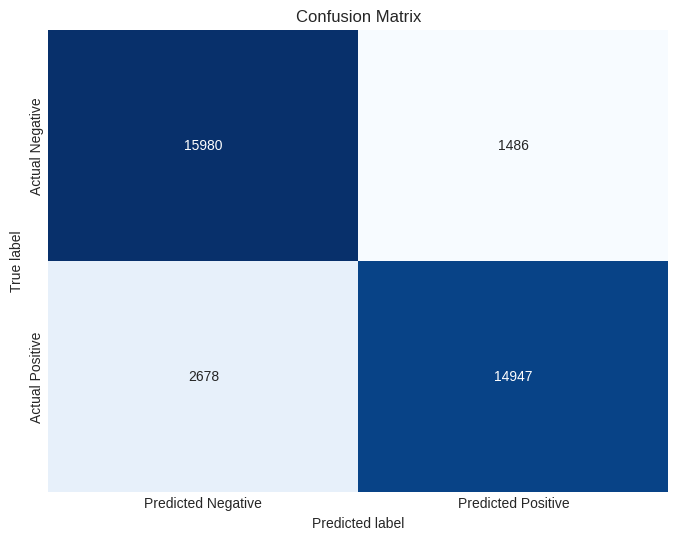

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_prob_hybrid = model_hybrid.predict([X_test_scaled, X_test_scaled])
y_pred = (y_prob_hybrid > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


# AUC-ROC curve

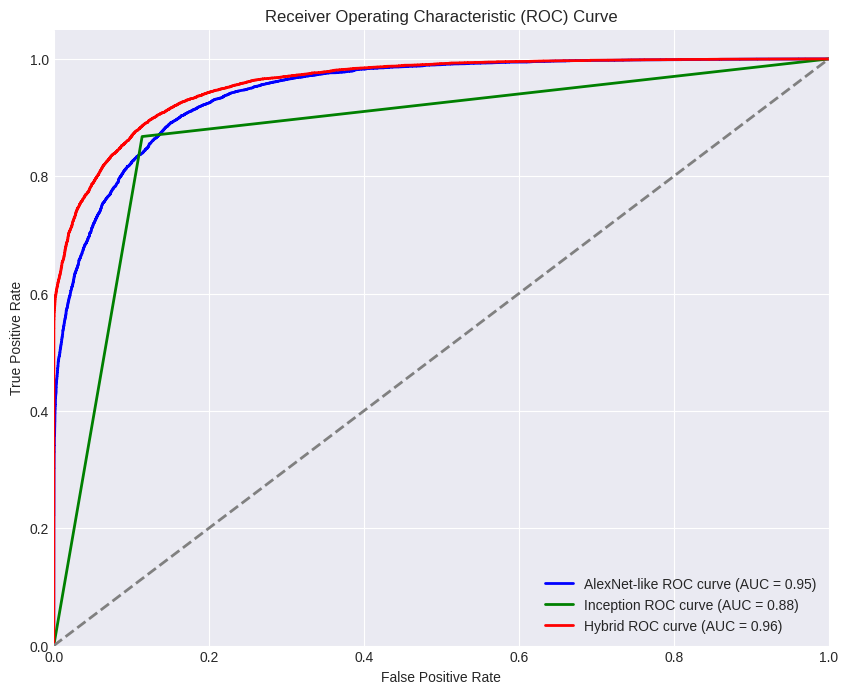

In [ ]:
# Calculate ROC curve and AUC for AlexNet-like model
fpr_alx, tpr_alx, thresholds_alx = roc_curve(y_test, y_pred_alx)
roc_auc_alx = auc(fpr_alx, tpr_alx)

# Calculate ROC curve and AUC for Inception model
fpr_inception, tpr_inception, thresholds_inception = roc_curve(y_test, y_test_pred)
roc_auc_inception = auc(fpr_inception, tpr_inception)

# Calculate ROC curve and AUC for Hybrid model
fpr_hybrid, tpr_hybrid, thresholds_hybrid = roc_curve(y_test, y_prob_hybrid)
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

# Plot all ROC curves in one graph
plt.figure(figsize=(10, 8))
plt.plot(fpr_alx, tpr_alx, color='blue', lw=2, label='AlexNet-like ROC curve (AUC = %0.2f)' % roc_auc_alx)
plt.plot(fpr_inception, tpr_inception, color='green', lw=2, label='Inception ROC curve (AUC = %0.2f)' % roc_auc_inception)
plt.plot(fpr_hybrid, tpr_hybrid, color='red', lw=2, label='Hybrid ROC curve (AUC = %0.2f)' % roc_auc_hybrid)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [19]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.4 MB/s eta 0:00:00


In [22]:
import shap
import tqdm

# Define the function for the hybrid model prediction
def hybrid_predict(sample_instances):
    return model_hybrid.predict([sample_instances, sample_instances])

# Create a sample of instances you want to explain
sample_instances = X_train[:500]  # Change this to the number of instances you want
sample_instance =X_test[:500]
# Create a background summary using k-means clustering for the training data
background_summary = shap.kmeans(X_train, 8)

# Create SHAP explainer using KernelExplainer with summarized background data
with tqdm.tqdm(total=len(sample_instances)) as pbar:
    explainer = shap.KernelExplainer(hybrid_predict, background_summary)
    pbar.update(len(sample_instances))

# Calculate SHAP values for the sample instances
with tqdm.tqdm(total=len(sample_instance)) as pbar:
    shap_values = explainer.shap_values(sample_instance)
    pbar.update(len(sample_instance))

# Choose an instance from the sample to create a force plot for
instance_index = 0  # Change this to the index of the instance you want
instance_to_explain = sample_instances[instance_index]

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

521/521 [==============================] - 4s 8ms/step


100%|██████████| 500/500 [23:28<00:00,  2.82s/it]


In [38]:
feature_names = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']
print(feature_names)

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


TypeError: only integer scalar arrays can be converted to a scalar index

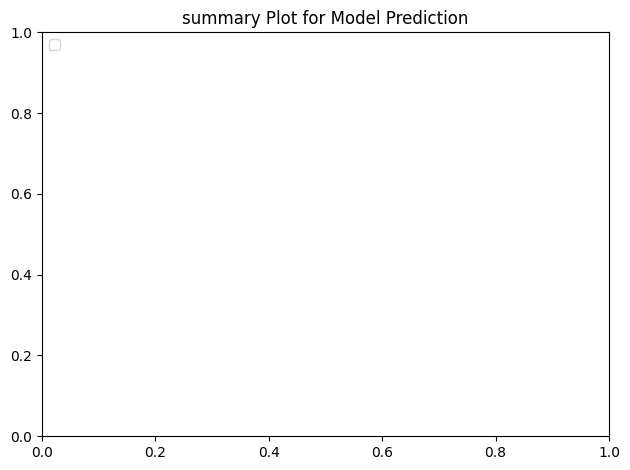

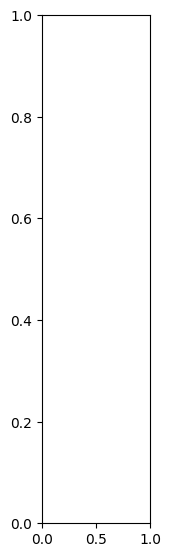

In [43]:
import shap
import matplotlib.pyplot as plt
plt.title('summary Plot for Model Prediction')
plt.legend(loc='upper left')
plt.tight_layout()
shap.summary_plot(shap_values, sample_instance, plot_type="bar", feature_names=feature_names, show=False)
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

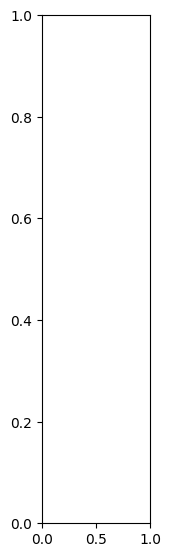

In [50]:
import shap
import tqdm
import matplotlib.pyplot as plt

# ... (Your previous code for setting up the explainer and calculating SHAP values)

# Ensure that shap_values has the expected shape
if len(shap_values) == 1:
    shap_values = shap_values[0]

# Choose an instance from the sample to create a force plot for
instance_index = 10  # Change this to the index of the instance you want

# Check if the instance_index is within the valid range
if 0 <= instance_index < len(sample_instance):
    instance_to_explain = sample_instance[instance_index]

    # Display the summary plot for the SHAP values with feature names
    shap.summary_plot(shap_values, sample_instance, feature_names=feature_names)

    # Create a force plot for the chosen instance
    # shap.force_plot(explainer.expected_value, shap_values[instance_index], instance_to_explain, feature_names=feature_names)
    plt.show()

else:
    print(f"Error: The instance_index {instance_index} is out of range for sample_instances.")

In [46]:
shap.waterfall_plot (shap.Explanation( values = shap_values [ instance_index ],
base_values = explainer . expected_value ,
data= data.iloc [ instance_index ]) ,
max_display =10)
plt.show ()


ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (17, 1)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [54]:
# Initialize JavaScript visualization ( only needed for Jupyter Notebook )
shap.initjs ()
# Choose the instance for which you want to visualize the force plot
instance_index = 0
shap.force_plot(explainer.expected_value , shap_values [ instance_index ],
feature_names = feature_names , matplotlib = True )
plt.show ()

NotImplementedError: matplotlib = True is not yet supported for force plots with multiple samples!